<a href="https://colab.research.google.com/github/joselyne20/Advanced-computer-vision/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BACKPROPAGATION ALGORITHM**

In [ ]:
import torch

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)


w = torch.tensor(1.0, requires_grad= True)

y_hat = w*x
loss = (y_hat -y)**2

print(loss)

# backward pass

loss.backward() # this will compute the whole backward process anc find gradient for us
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


##**GRADIENT DESCENT USING AUTO GRAD**

In [ ]:
# manual gradient using numpy

import numpy as np

# f = w*x
#f = 2*x
X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([2,4,6,8], dtype = np.float32) # y is equal to 2x so we multiplied each value of x with 2

w = 0.0 # initialized our weight

# model prediction
def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

#gradient
#MSE = 1/N *(w*x=y)**2
#dJ/dw = 1/N 2x (w*x - y) J is objective function(it is numeraical computed derivative)

def gradient(x,y, y_predicted): # calculating the gradient of our loss with respect to our parameters
  return np.dot(2*x, y_predicted - y)/len(x)

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#training

learning_rate = 0.01
n_iters = 30

for epoch in range(n_iters):
  #prediction =forward pass
  y_pred = forward(X)
  # loss
  l = loss(Y, y_pred)
  #gradients
  dw = gradient(X,Y, y_pred)

  # update weights

  w -= learning_rate *dw

  if epoch % 1 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018677
epoch 4: w = 0.956, loss = 11.31448555
epoch 5: w = 1.113, loss = 8.17471600
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939264
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011310
epoch 13: w = 1.758, loss = 0.60698175
epoch 14: w = 1.794, loss = 0.43854439
epoch 15: w = 1.825, loss = 0.31684822
epoch 16: w = 1.851, loss = 0.22892293
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237932
epoch 21: w = 1.934, loss = 0.04506905
epoch 22: w = 1.944, loss = 0.03256244
epoch 23: w = 1.952, loss = 0.02352631
epoch 24: w = 1.960, loss = 0.01699772
epoch 25: w = 1.966, loss = 

###using pytorch to calcute gradient descent

In [ ]:
import torch

# f = w*x
#f = 2*x
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32) # y is equal to 2x so we multiplied each value of x with 2

w =torch.tensor(0.0, dtype=torch.float32, requires_grad= True) # initialized our weight

# model prediction
def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#training

learning_rate = 0.01
n_iters = 30

for epoch in range(n_iters):
  #prediction =forward pass
  y_pred = forward(X)
  # loss
  l = loss(Y, y_pred)
  #gradients = backward pass
  l.backward() # dl/dw this will calculate the gradient of loss with respect to weights

  # update weights
  with torch.no_grad():
    w -= learning_rate *w.grad # this is not a part of our computational graph that's we have to remove requires grad
  # Zero gradients
  w.grad.zero_() # to make sure our gradient is set to zero in the next iteration

  if epoch % 10 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
Prediction after training: f(5) = 9.924


1. Design model (input, outup size, forward pass)
2. construct loss and optimizer
3. Training loop
*   forward pass: compute prediction
*   backward pass: gradients
*   update weights






In [ ]:
import torch
import torch.nn as nn
# f = w*x
#f = 2*x
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32) # y is equal to 2x so we multiplied each value of x with 2

w =torch.tensor(0.0, dtype=torch.float32, requires_grad= True) # initialized our weight

# model prediction
def forward(x):
  return w*x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#training

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss() # Calling function to calculate loss
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(n_iters):
  #prediction =forward pass
  y_pred = forward(X)
  # loss
  l = loss(Y, y_pred)
  #gradients = backward pass
  l.backward() # dl/dw this will calculate the gradient of loss with respect to weights

  # automatically update weights
  optimizer.step()
  # set back Zero gradients
  optimizer.zero_grad() # to make sure our gradient is set to zero in the next iteration

  if epoch % 10 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


###Step 4

In [ ]:
import torch
import torch.nn as nn
# f = w*x
#f = 2*x
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32) # y is equal to 2x so we multiplied each value of x with 2

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape # we have 4 smaple and one feature for each sample
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

#training

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss() # Calling function to calculate loss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
  #prediction =forward pass
  y_pred = model(X)
  # loss
  l = loss(Y, y_pred)
  #gradients = backward pass
  l.backward() # dl/dw this will calculate the gradient of loss with respect to weights

  # automatically update weights
  optimizer.step()
  # set back Zero gradients
  optimizer.zero_grad() # to make sure our gradient is set to zero in the next iteration

  if epoch % 10 ==0:
    [w, b] =model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = 2.970
epoch 1: w = 0.651, loss = 13.00693035
epoch 11: w = 1.481, loss = 0.52112138
epoch 21: w = 1.624, loss = 0.18733896
epoch 31: w = 1.655, loss = 0.16858393
epoch 41: w = 1.669, loss = 0.15856823
epoch 51: w = 1.679, loss = 0.14933354
epoch 61: w = 1.689, loss = 0.14064141
epoch 71: w = 1.698, loss = 0.13245529
epoch 81: w = 1.707, loss = 0.12474579
epoch 91: w = 1.716, loss = 0.11748492
Prediction after training: f(5) = 9.430


#LINEAR REGRESSION

We generated a regression datasets from sklearn with 100 sample and 1 feature each using numpy and converted numpy to torch tensor using "from_numpy function" and the we reshaped y to a column vector using "view " function

we created a model using built_in "nn.Linear" ans passes required parameters nd then created loss in this case we used MSE and SGD optimizer then trained our model with 100 epochs to see the results

epoch: 500, loss = 332.5685
epoch: 1000, loss = 332.5676
epoch: 1500, loss = 332.5676
epoch: 2000, loss = 332.5676
epoch: 2500, loss = 332.5676
epoch: 3000, loss = 332.5676
epoch: 3500, loss = 332.5676
epoch: 4000, loss = 332.5676
epoch: 4500, loss = 332.5676
epoch: 5000, loss = 332.5676


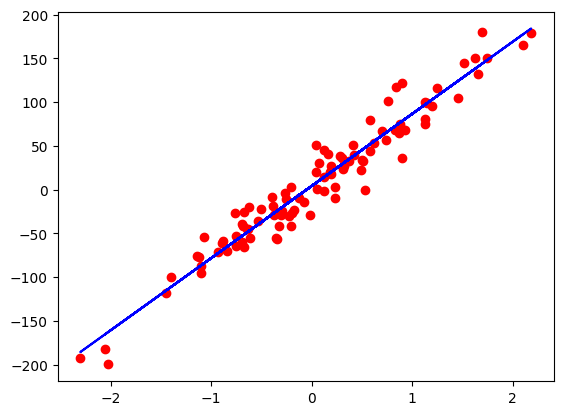

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#0. prepare data

x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # reshape our  tensor
n_samples, n_features = x.shape
# Model
input_size =n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss() # calculate mean square error
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#training loop

num_epoch = 5000
for epoch in range(num_epoch):

  # forward pass and loss
  y_predicted = model(x)
  loss= criterion(y_predicted, y)

  #backward pass
  loss.backward()
  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 500 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plotting

predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()




# LOGISTIC REGRESSION

we used the same process as the Linear regression

1. Design model (input, outup size, forward pass)
2. construct loss and optimizer
3. Training loop
*   forward pass: compute prediction
*   backward pass: gradients
*   update weights

We are going train a model with binary classification problem to predict the breast cancer based on the input features

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#data processing

bc =datasets.load_breast_cancer()

x,y =bc.data, bc.target

n_samples, n_features = x.shape
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

#scale our data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test =y_test.view(y_test.shape[0], 1)

# model
# f = mx +b, sigmoid function at the end

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)  # Linear layer added
  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model =LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss() # calculate mean square error
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#training loop

num_epoch = 100
for epoch in range(num_epoch):

  # forward pass and loss
  y_predicted = model(x_train) # call model and pass training data
  loss= criterion(y_predicted, y_train)

  #backward pass
  loss.backward()

  # updating weights
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# #Evaluating our model

with torch.no_grad():
  y_predicted = model(x_test)
  y_predicted_cls = y_predicted.round()

  acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0]) # this will return the number of test samples
  print(f'accuracy = {acc:.4f}')


epoch: 10, loss = 0.4986
epoch: 20, loss = 0.4285
epoch: 30, loss = 0.3809
epoch: 40, loss = 0.3461
epoch: 50, loss = 0.3193
epoch: 60, loss = 0.2980
epoch: 70, loss = 0.2805
epoch: 80, loss = 0.2658
epoch: 90, loss = 0.2532
epoch: 100, loss = 0.2423
accuracy = 0.9123
